Direct gap :  True
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})


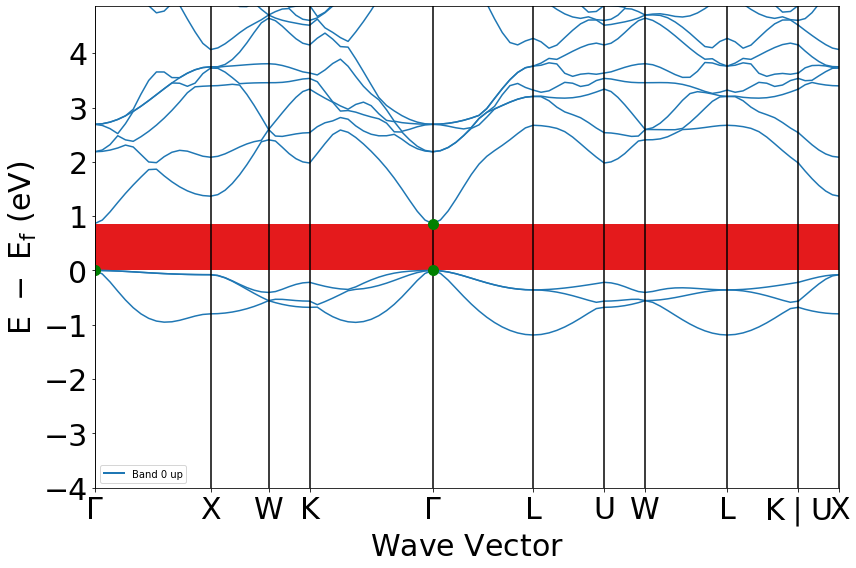

In [109]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

with MPRester("6FCK47cyF2mQPZ9CdW") as m:
    struct = m.get_structure_by_material_id("mp-581024")
    bs = m.get_bandstructure_by_material_id("mp-581024")

bg = bs.get_band_gap()
print("Direct gap : ", bg.get('direct'))
bsp = BSPlotter(bs)
info = bsp.bs_plot_data()
dist = info.get('distances')
cbminfo = bs.get_cbm()
vbminfo = bs.get_vbm()
print(cbminfo.get('band_index'))
print(vbminfo.get('band_index'))

bsp.get_plot()
plt.plot(dist[4][0], info['energy']['1'][4][16][0], 'og', markersize = 10)
plt.plot(dist[0][0], info['energy']['1'][0][13][0], 'og', markersize = 10)
plt.plot(dist[4][0], info['energy']['1'][4][13][0], 'og', markersize = 10)
x = [dist[0][0], dist[9][-1]]
y = [info['energy']['1'][4][16][0], info['energy']['1'][4][16][0]]
plt.fill_between(x, y)

In [110]:
max_slope_cbm = 0
cbm_max_i = 0
min_slope_cbm = 100000000
cbm_min_i = 0

max_slope_vbm = 0
vbm_max_i = 0
vbm_max_j = 0
min_slope_vbm = 100000000
vbm_min_i = 0
vbm_min_j = 0

for i in range(len(dist)) :
    slope = abs((dist[i][-1] - dist[i][0])/(info['energy']['1'][i][16][-1] - info['energy']['1'][i][16][0]))
    if slope < min_slope_cbm :
        min_slope_cbm = slope
        cbm_min_i = i
    if slope > max_slope_cbm :
        max_slope_cbm = slope
        cbm_max_i = i

for j in [13, 14, 15] :
    for i in range(len(dist)) :
        slope = abs((dist[i][-1] - dist[i][0])/(info['energy']['1'][i][j][-1] - info['energy']['1'][i][j][0]))
        if slope < min_slope_vbm :
            min_slope_vbm = slope
            vbm_min_i = i
            vbm_min_j = j
        if slope > max_slope_vbm :
            max_slope_vbm = slope
            vbm_max_i = i
            vbm_max_j = j

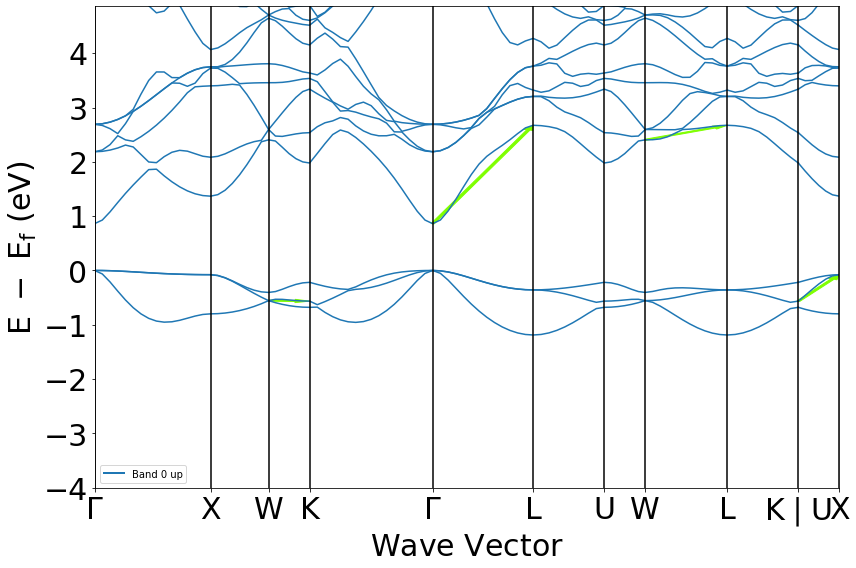

In [111]:
bsp.get_plot()
plt.arrow(dist[cbm_max_i][0], info['energy']['1'][cbm_max_i][16][0], dist[cbm_max_i][-1] - dist[cbm_max_i][0], info['energy']['1'][cbm_max_i][16][-1] - info['energy']['1'][cbm_max_i][16][0],color='chartreuse',width=0.02,length_includes_head=True)
plt.arrow(dist[cbm_min_i][0], info['energy']['1'][cbm_min_i][16][0], dist[cbm_min_i][-1] - dist[cbm_min_i][0], info['energy']['1'][cbm_min_i][16][-1] - info['energy']['1'][cbm_min_i][16][0],color='chartreuse',width=0.02,length_includes_head=True)
plt.arrow(dist[vbm_max_i][0], info['energy']['1'][vbm_max_i][vbm_max_j][0], dist[vbm_max_i][-1] - dist[vbm_max_i][0], info['energy']['1'][vbm_max_i][vbm_max_j][-1] - info['energy']['1'][vbm_max_i][vbm_max_j][0],color='chartreuse',width=0.02,length_includes_head=True)
plt.arrow(dist[vbm_min_i][0], info['energy']['1'][vbm_min_i][vbm_min_j][0], dist[vbm_min_i][-1] - dist[vbm_min_i][0], info['energy']['1'][vbm_min_i][vbm_min_j][-1] - info['energy']['1'][vbm_min_i][vbm_min_j][0],color='chartreuse',width=0.02,length_includes_head=True)

plt.show()

La masse effective au sommet de la bande de valence vaut  0.523335857066144  unités atomiques et celle à la base de la bande de conduction vaut  0.03391994778171118  unités atomiques.


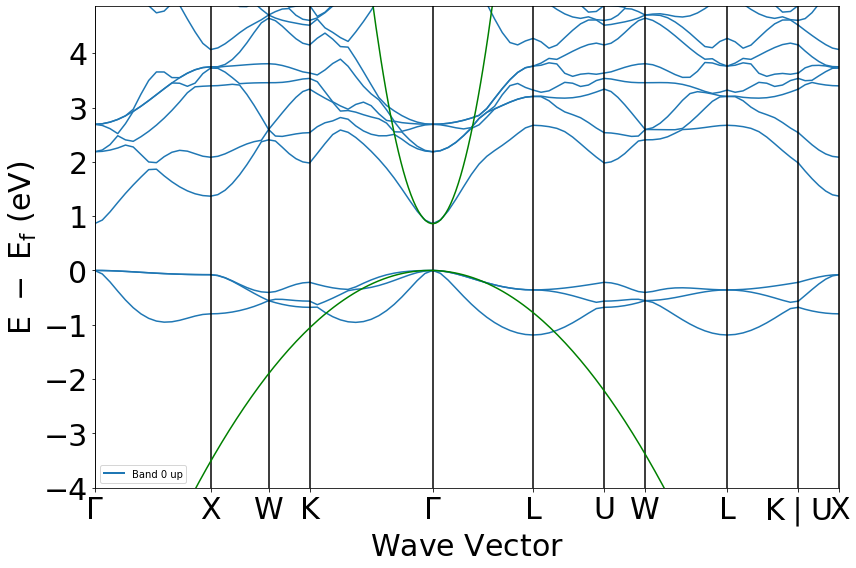

In [112]:
bsp.get_plot()

arr_cbm = [info['energy']['1'][3][16][-2], info['energy']['1'][4][16][0], info['energy']['1'][4][16][1]]
dist_cbm = [dist[3][-2], dist[4][0], dist[4][1]]

poly_cbm = np.polyfit(dist_cbm, arr_cbm, 2) 
abs_cbm = np.linspace(dist[0][0],dist[9][-1],300)
plt.plot(abs_cbm,np.polyval(poly_cbm, abs_cbm),'g')
    
arr_vbm = [info['energy']['1'][3][15][-2], info['energy']['1'][4][15][0], info['energy']['1'][4][15][1]]
dist_vbm = [dist[3][-2], dist[4][0], dist[4][1]]

poly_vbm = np.polyfit(dist_vbm, arr_vbm, 2) 
abs_vbm = np.linspace(dist[0][0],dist[9][-1],300)
plt.plot(abs_vbm,np.polyval(poly_vbm, abs_vbm),'g')

print("La masse effective au sommet de la bande de valence vaut ", -1/poly_vbm[0], " unités atomiques et celle à la base de la bande de conduction vaut ", 1/poly_cbm[0], " unités atomiques.")